In [1]:
# 튜토리얼 진행을 위한 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

np.set_printoptions(suppress=True, precision=3)

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

# 회귀 (regression)

회귀 분석(regression analysis)은 관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한뒤 적합도를 측정해 내는 분석 방법입니다.

하나의 종속변수와 하나의 독립변수 사이의 관계를 분석할 경우를 **단순회귀분석(simple regression analysis)**, 하나의 종속변수와 여러 독립변수 사이의 관계를 규명하고자 할 경우를 **다중회귀분석(multiple regression analysis)**이라고 합니다.

**예시**
- 주택 가격 예측
- 매출액 예측
- 주가 예측
- 온도 예측

대표적인 회귀 모델로는

- 최소제곱법(Ordinary Least Squares)을 활용한 **LinearRegression**
- 경사하강법(Gradient Descent)을 활용한 **SGDRegressor**
- 선형 회귀 모델에 L1, L2 규제를 더한 **Lasso, Ridge, ElasticNet**

등이 있습니다.

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

## 회귀 모델을 위한 평가 지표

In [2]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    np.random.seed(123)
    x = np.arange(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, y, yy

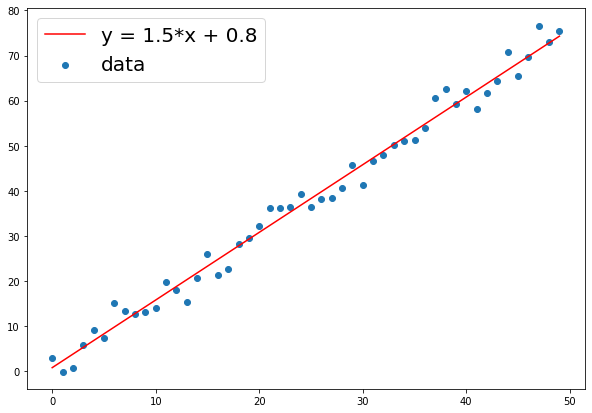

w: 1.5, b: 0.8


In [3]:
x, y_true, y_pred = make_linear(size=50, w=1.5, b=0.8, noise=5.5)

### R2 Score (결정계수)

- 통계학 회귀분석에서 자주 쓰이는 회귀 평가 지표.
- 실제 값의 분산 대비 예측 값의 분산 비율을 나타냅니다.
- 1에 가까울 수록 좋은 모델, 0에 가까울 수록 나쁨, **음수가 나오면 잘못 평가** 되었음을 의미합니다.

$\Large R^{2}= 1-\frac{\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$

Python 코드로 위의 수식을 그대로 구현합니다.

`r2`에 결과를 대입합니다.

In [4]:
# 코드를 입력해 주세요
r2 = 1 - ((y_true - y_pred)**2).sum() / ((y_true - y_true.mean())**2).sum()

In [5]:
# 코드검증
print('r2 score = {:.3f}'.format(r2))

r2 score = 0.986


`sklearn.metrics`패키지에 `r2_score`로 구현

In [6]:
from sklearn.metrics import r2_score

`r2_` 변수에 결과를 대입합니다.

In [7]:
# 코드를 입력해 주세요
r2_ = r2_score(y_true, y_pred)

In [8]:
# 코드검증
print('r2 score = {:.3f}'.format(r2_))

r2 score = 0.986


### MSE (Mean Squared Error)

- 예측 값과 실제 값의 차이에 대한 **제곱**에 대하여 평균을 낸 값
- MSE 오차가 작으면 작을수록 좋지만, 과대적합이 될 수 있음에 주의합니다.
- 예측 값과 실제 값보다 크게 예측이 되는지 작게 예측되는지 알 수 없습니다.

$\Large MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}$

Python 코드로 위의 수식을 그대로 구현합니다.

`mse` 변수에 결과를 대입합니다.

In [9]:
# 코드를 입력해 주세요
mse = ((y_true - y_pred)**2).mean()

In [10]:
# 코드검증
print('mse = {:.3f}'.format(mse))

mse = 6.540


`sklearn.metrics` 패키지에 `mean_squared_error`를 활용합니다.

In [11]:
from sklearn.metrics import mean_squared_error

`mse_` 변수에 결과를 대입합니다.

In [12]:
# 코드를 입력해 주세요
mse_ = mean_squared_error(y_true, y_pred)

In [13]:
# 코드검증
print('mse = {:.3f}'.format(mse_))

mse = 6.540


### MAE (Mean Absolute Error)

- 예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값
- 실제 값과 예측 값 차이를 절대 값으로 변환해 평균을 계산합니다. 작을수록 좋지만, 과대적합이 될 수 있음에 주의합니다.
- **스케일에 의존적**입니다.

예를 들어, 아파트 집값은 10억, 20억으로 구성되어 있고, 과일 가격은 5000원, 10000원으로 구성되어 있을때,

예측하는 각각 모델의 MSE 가 똑같이 100 이 나왔다고 가정한다며,동일한 오차율이 아님에도 불구하고 동일하게 평가되어 지는 현상이 발생합니다.
이는 MSE 오차에서도 마찬가지 입니다.

$\Large MAE = \frac{1}{n}\sum_{i=1}^{n}{|(y_i - \hat{y_i})|}$

Python 코드로 위의 수식을 그대로 구현합니다.

`mae` 변수에 결과를 대입합니다.

In [14]:
# 코드를 입력해 주세요
mae = np.abs(y_true - y_pred).mean()

In [15]:
# 코드검증
print('mae = {:.3f}'.format(mae))

mae = 2.084


`sklearn.metrics` 패키지에 `mean_absolute_error`를 활용합니다.

In [16]:
from sklearn.metrics import mean_absolute_error

`mae_` 변수에 결과를 대입합니다.

In [17]:
# 코드를 입력해 주세요
mae_ = mean_absolute_error(y_true, y_pred)

In [18]:
# 코드검증
print('mae = {:.3f}'.format(mae_))

mae = 2.084


### RMSE (Root Mean Squared Error)

$\Large RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}}$

- 예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값
- MSE의 장단점을 거의 그대로 따라갑니다.
- 제곱 오차에 대한 왜곡을 줄여줍니다.

Python 코드로 위의 수식을 그대로 구현합니다.

`rmse` 변수에 결과를 대입합니다.

In [19]:
# 코드를 입력해 주세요
rmse = np.sqrt(mse)

In [20]:
print('mse = {:.3f}, rmse = {:.3f}'.format(mse, rmse))

mse = 6.540, rmse = 2.557


`sklearn.metrics` 패키지에는 별도로 **RMSE 평가지표는 없습니다.**

## 회귀 모델 (Regression Models)

### 모델별 성능 확인을 위한 함수

In [21]:
# 모듈 설치
!pip install teddynote -q

In [22]:
from teddynote import utils

# 그래프 사이즈 설정
utils.set_plot_options(figsize=(12, 10))

# MSE 에러 설정
utils.set_plot_error('mse')

### 보스턴 집 값 데이터

**데이터 로드 (load_boston)**

In [23]:
from sklearn.datasets import load_boston

In [24]:
# 코드를 입력해 주세요
data = load_boston()

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [25]:
# 코드를 입력해 주세요
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

target 데이터도 Column 에 추가 합니다.

In [26]:
# 코드검증
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 자치시 별 범죄율
* **ZN**: 25,000 평방 피트를 초과하는 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 토지 비율
* **CHAS**: 찰스 강과 인접한 경우에 대한 더비 변수 (1= 인접, 0= 인접하지 않음)
* **NOX**: 산화 질소 농도 (10ppm)
* **RM**:주택당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시별 학생-교사 비율
* **B**: 인구당 흑인의 비율. 1000(Bk - 0.63)^2, (Bk는 흑인의 비율을 뜻함)
* **LSTAT**: 하위 계층의 비율
* **target**: 자가 주택의 중앙값 (1,000 달러 단위)

**학습(train) / 테스트(test)** 용 데이터를 분할 합니다.

In [27]:
from sklearn.model_selection import train_test_split

# 시드 설정
SEED=30

In [28]:
# 코드를 입력해 주세요
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], random_state=SEED)

`x_train`, `x_test`의 shape를 출력합니다.

In [29]:
# 코드를 입력해 주세요
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [30]:
# 검증코드
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45
393,8.64476,0.0,18.10,0.0,0.693,6.193,92.6,1.7912,24.0,666.0,20.2,396.90,15.17
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
363,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64


## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# 코드를 입력해 주세요
model = LinearRegression()

In [33]:
# 코드를 입력해 주세요
model.fit(x_train, y_train)

LinearRegression()

`pred` 변수에 예측 결과를 대입합니다.

In [34]:
# 코드를 입력해 주세요
pred = model.predict(x_test)

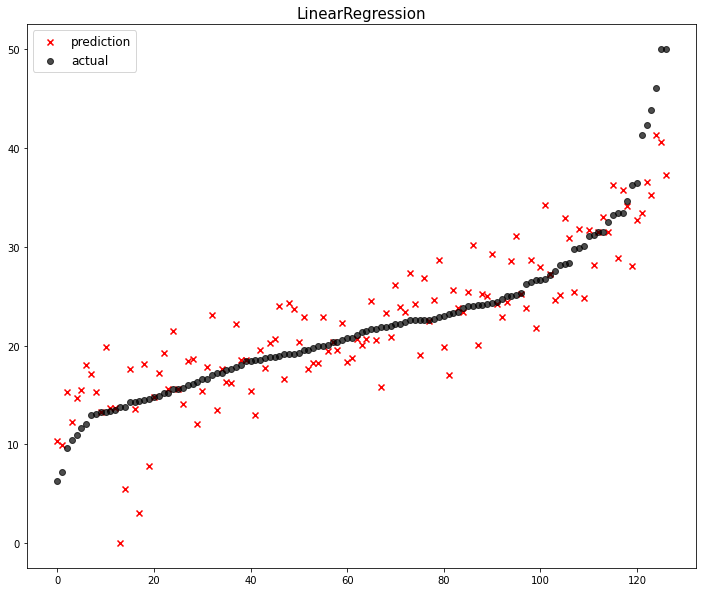

,model,error
0,LinearRegression,16.485165


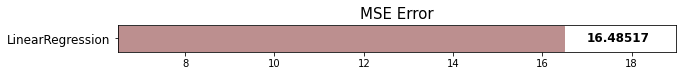

In [35]:
utils.plot_error('LinearRegression', y_test, pred)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) α를 곱한다. 
* α를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), α를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) α를 곱하여 오차에 더한다. 
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다. 


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

### Ridge (L2 Regularization)

- L2 규제 계수를 적용합니다. 
- 선형회귀에 가중치 (weight)들의 제곱합에 대한 최소화를 추가합니다.

**주요 hyperparameter**
- `alpha`: 규제 계수

**수식**

`α`는 규제 계수(강도)를 의미합니다.

$\Large Error=MSE+α\sum_{i=1}^{n}{w_i^2}$ 

In [36]:
from sklearn.linear_model import Ridge

**규제 계수(alpha)**를 정의합니다.

In [37]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

,model,error
0,Ridge(alpha=100),18.018382
1,Ridge(alpha=10),17.068408
2,Ridge(alpha=1),16.652412
3,LinearRegression,16.485165
4,Ridge(alpha=0.0001),16.485151
5,Ridge(alpha=0.001),16.485020
6,Ridge(alpha=0.01),16.483801
7,Ridge(alpha=0.1),16.479483


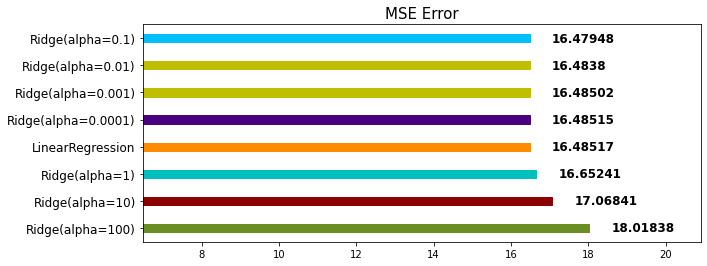

In [38]:
for alpha in alphas:
    # 코드를 입력해 주세요
    ridge = Ridge(alpha=alpha, random_state=SEED)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    utils.add_error('Ridge(alpha={})'.format(alpha), y_test, pred)
utils.plot_all()

coef_는 **feature의 가중치**를 보여줍니다.

가중치(weight)를 토대로 회귀 예측시 어떤 feature가 주요하게 영향을 미쳤는지 보여 줍니다.

In [39]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [40]:
ridge.coef_

array([ -0.115,   0.04 ,  -0.003,   3.487, -18.012,   3.729,   0.005,
        -1.529,   0.325,  -0.013,  -0.957,   0.006,  -0.557])

**DataFrame**으로 feature별 가중치를 시각화 합니다.

In [41]:
# 코드를 입력해 주세요
pd.DataFrame(list(zip(x_train.columns, ridge.coef_)), columns=['features', 'importances']).sort_values('importances')

,features,importances
4,NOX,-18.012494
7,DIS,-1.529399
10,PTRATIO,-0.957246
12,LSTAT,-0.557350
0,CRIM,-0.114736
9,TAX,-0.013134
2,INDUS,-0.002879
6,AGE,0.004546
11,B,0.006369
1,ZN,0.040452


In [42]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

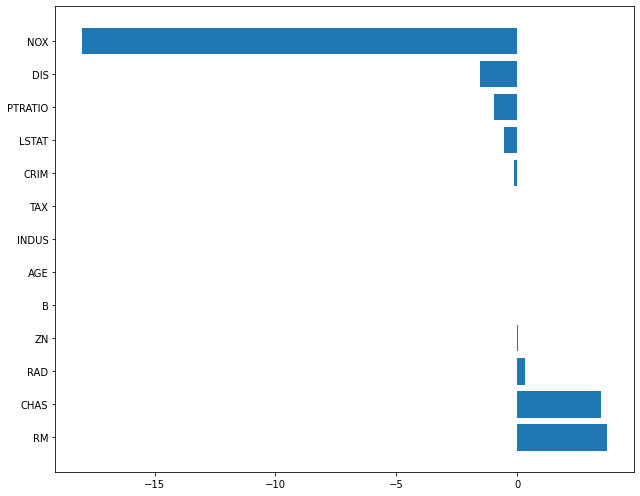

In [43]:
plot_coef(x_train.columns, ridge.coef_)

이번에는, **alpha 값에 따른 coef 의 차이**를 확인해 봅시다

In [44]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

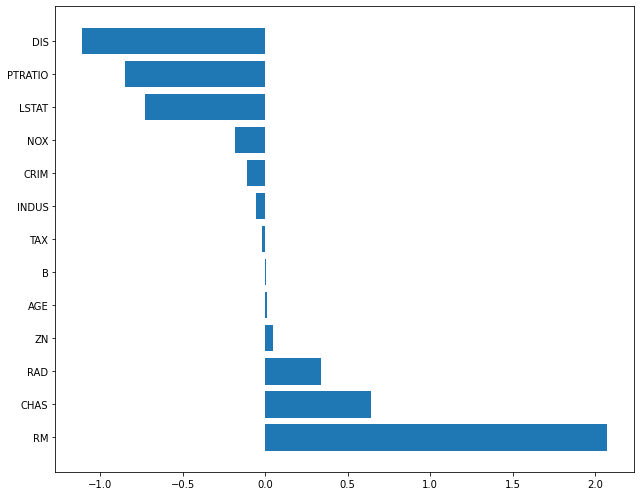

In [45]:
plot_coef(x_train.columns, ridge_100.coef_)

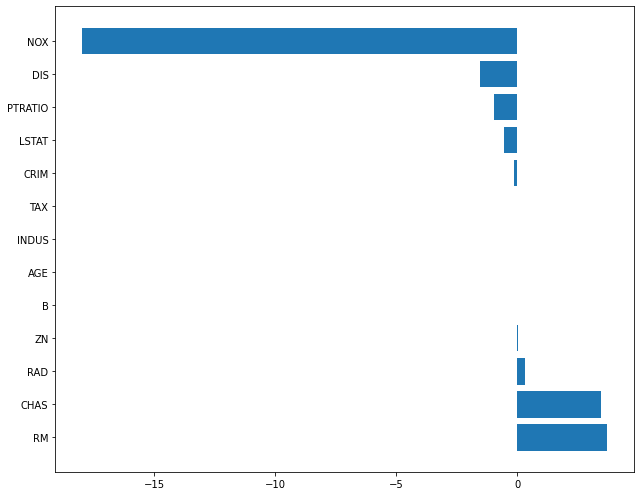

In [46]:
plot_coef(x_train.columns, ridge_001.coef_)

### Lasso (L1 Regularization)

Lasso(Least Absolute Shrinkage and Selection Operator)

- 선형 회귀에 L1 규제 계수를 적용합니다.
- 가중치(weight)의 절대 값의 합을 최소화 하는 계수를 추가 합니다.
- 불필요한 회귀 계수를 급격히 감소, 0으로 만들어 제거합니다.
- 특성(Feature) 선택에 유리합니다.

**주요 hyperparameter**
- `alpha`: L1 규제 계수

**수식**  

`α`는 규제 계수(강도)를 의미합니다.

$\Large Error=MSE+α\sum_{i=1}^{n}{|w_i|}$

In [47]:
from sklearn.linear_model import Lasso

In [48]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

,model,error
0,Lasso(alpha=100),48.725206
1,Lasso(alpha=10),27.146245
2,Lasso(alpha=1),19.882302
3,Ridge(alpha=100),18.018382
4,Lasso(alpha=0.1),17.083615
5,Ridge(alpha=10),17.068408
6,Ridge(alpha=1),16.652412
7,LinearRegression,16.485165
8,Ridge(alpha=0.0001),16.485151
9,Ridge(alpha=0.001),16.485020


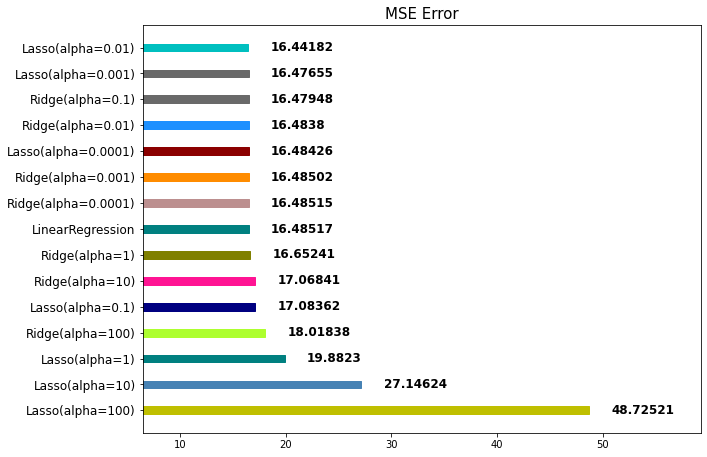

In [49]:
for alpha in alphas:
    # 코드를 입력해 주세요
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    utils.add_error('Lasso(alpha={})'.format(alpha), y_test, pred)
utils.plot_all()

In [50]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

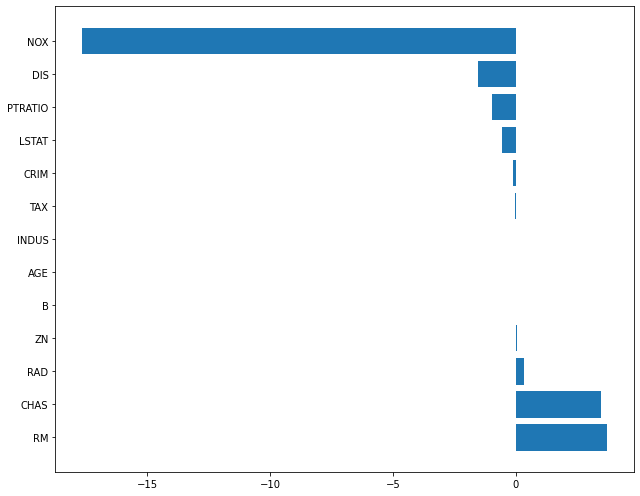

In [51]:
plot_coef(x_train.columns, lasso_001.coef_)

In [52]:
lasso_001.coef_

array([ -0.115,   0.04 ,  -0.004,   3.468, -17.66 ,   3.73 ,   0.004,
        -1.523,   0.324,  -0.013,  -0.954,   0.006,  -0.558])

Lasso 모델에 너무 큰 alpha 계수를 적용하면 **대부분의 feature들의 가중치가 0으로 수렴**합니다.

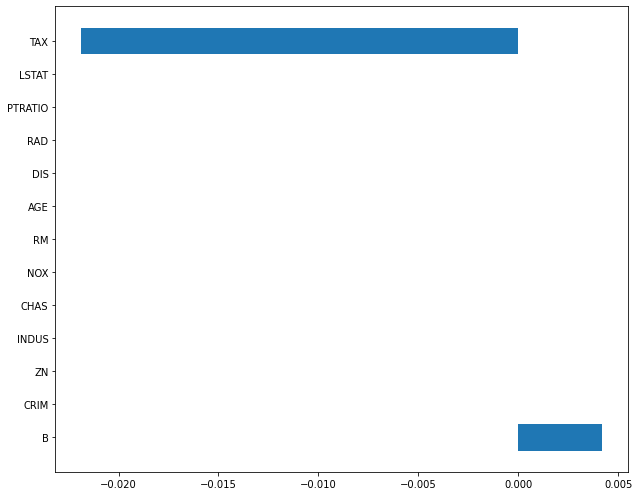

In [53]:
plot_coef(x_train.columns, lasso_100.coef_)

In [54]:
lasso_100.coef_

array([-0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   ,
        0.   , -0.022, -0.   ,  0.004, -0.   ])

### ElasticNet

Elastic Net 회귀모형은 **가중치의 절대값의 합(L1)과 제곱합(L2)을 동시에** 제약 조건으로 가지는 모형입니다.

In [55]:
Image(url='https://miro.medium.com/max/1312/1*j_DDK7LbVrejTq0tfmavAA.png', width=500)

**주요 hyperparameter**

`alpha`: 규제 계수

`l1_ratio (default=0.5)`

- l1_ratio = 0 (L2 규제만 사용). 
- l1_ratio = 1 (L1 규제만 사용). 
- 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [56]:
from sklearn.linear_model import ElasticNet

In [57]:
alpha=0.01
ratios = [0.2, 0.5, 0.8]

,model,error
0,Lasso(alpha=100),48.725206
1,Lasso(alpha=10),27.146245
2,Lasso(alpha=1),19.882302
3,Ridge(alpha=100),18.018382
4,Lasso(alpha=0.1),17.083615
5,Ridge(alpha=10),17.068408
6,ElasticNet(l1_ratio=0.2),16.914638
7,ElasticNet(l1_ratio=0.5),16.822431
8,Ridge(alpha=1),16.652412
9,ElasticNet(l1_ratio=0.8),16.638817


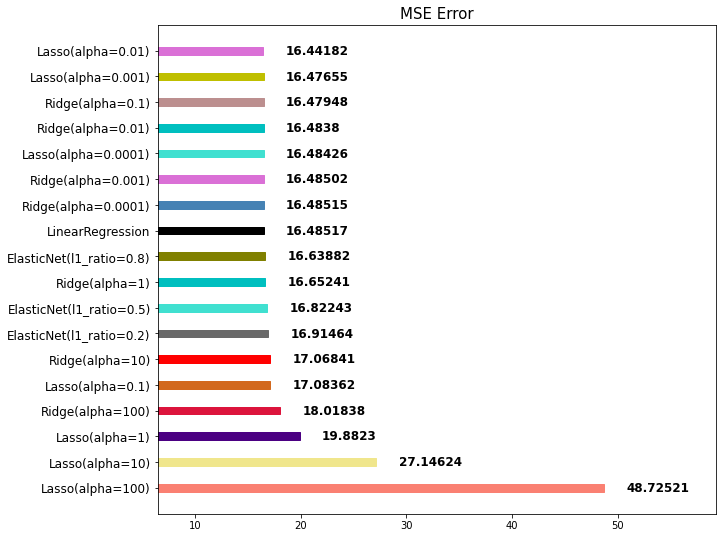

In [58]:
for ratio in ratios:
    # 코드를 입력해 주세요
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=SEED)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    utils.add_error('ElasticNet(l1_ratio={})'.format(ratio), y_test, pred)
utils.plot_all()

In [59]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

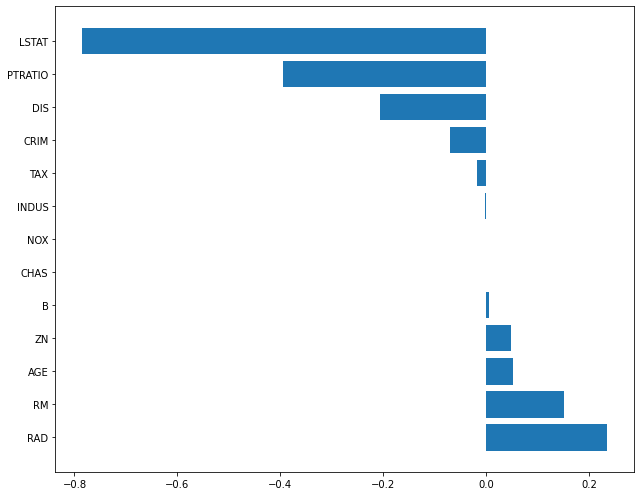

In [60]:
plot_coef(x_train.columns, elsticnet_20.coef_)

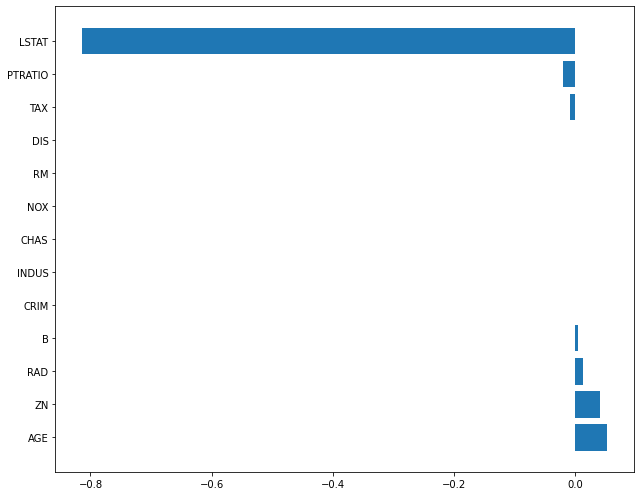

In [61]:
plot_coef(x_train.columns, elsticnet_80.coef_)

## Scaler 적용

In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### MinMaxScaler (정규화)

정규화 (Normalization)도 표준화와 마찬가지로 데이터의 스케일을 조정합니다.

정규화가 표준화와 다른 가장 큰 특징은 **모든 데이터가 0 ~ 1 사이의 값**을 가집니다.

즉, 최대값은 1, 최소값은 0으로 데이터의 범위를 조정합니다.

**min값과 max값을 0~1사이로 정규화**

In [63]:
# 코드를 입력해 주세요
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [64]:
# 코드검증
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.12,0.38,0.07,0.34,0.52,0.66,0.28,0.37,0.42,0.62,0.90,0.31
std,0.11,0.24,0.25,0.25,0.24,0.14,0.30,0.22,0.38,0.32,0.23,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.16,0.00,0.12,0.45,0.40,0.10,0.13,0.17,0.46,0.95,0.14
50%,0.00,0.00,0.29,0.00,0.31,0.51,0.76,0.22,0.17,0.27,0.69,0.99,0.27
75%,0.04,0.20,0.64,0.00,0.49,0.59,0.93,0.43,1.00,0.91,0.81,1.00,0.44
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### StandardScaler (표준화)

표준화는 데이터의 **평균을 0 분산 및 표준편차를 1**로 만들어 줍니다.

**표준화를 하는 이유**

- 서로 **다른 통계 데이터들을 비교하기 용이**하기 때문입니다.
- 표준화를 하면 평균은 0, 분산과 표준편차는 1로 만들어 데이터의 **분포를 단순화 시키고, 비교를 용이**하게 합니다.

$\Large z = \frac{(X - \mu)}{\sigma}$

In [65]:
std_scaler = StandardScaler()

In [66]:
std_scaled = std_scaler.fit_transform(x_train)

In [67]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-0.50,-1.51,-0.27,-1.43,-3.76,-2.21,-1.28,-0.98,-1.30,-2.64,-3.88,-1.51
25%,-0.40,-0.50,-0.86,-0.27,-0.92,-0.56,-0.88,-0.82,-0.63,-0.77,-0.67,0.21,-0.80
50%,-0.38,-0.50,-0.36,-0.27,-0.14,-0.11,0.33,-0.25,-0.52,-0.46,0.31,0.38,-0.20
75%,-0.02,0.33,1.04,-0.27,0.64,0.46,0.91,0.69,1.66,1.52,0.81,0.43,0.64
max,9.03,3.66,2.45,3.68,2.76,3.41,1.13,3.31,1.66,1.79,1.63,0.43,3.41


## 파이프라인 (pipeline)

scikit-learn의 **전처리(pre-processing)용 모듈과 모델의 학습 기능을 파이프라인으로 합칠 수** 있습니다.

- 파이프라인으로 결합된 모형은 원래의 모형이 가지는 `fit`, `predict` 함수를 가집니다.
- 파이프라인에 정의된 순서에 따라 전처리 모듈이 먼저 호출되어 전처리 과정을 거친 후 모델이 학습하게 됩니다.

[Pipeline 공식 도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [68]:
from sklearn.pipeline import make_pipeline

- `MinMaxScaler`를 적용
- ElasticNet, `alpha=0.1`, `l1_ratio=0.2` 적용

In [69]:
# 코드를 입력해 주세요
pipeline = make_pipeline(
    MinMaxScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [70]:
# 코드를 입력해 주세요
pipeline.fit(x_train, y_train)
pipeline_pred = pipeline.predict(x_test)

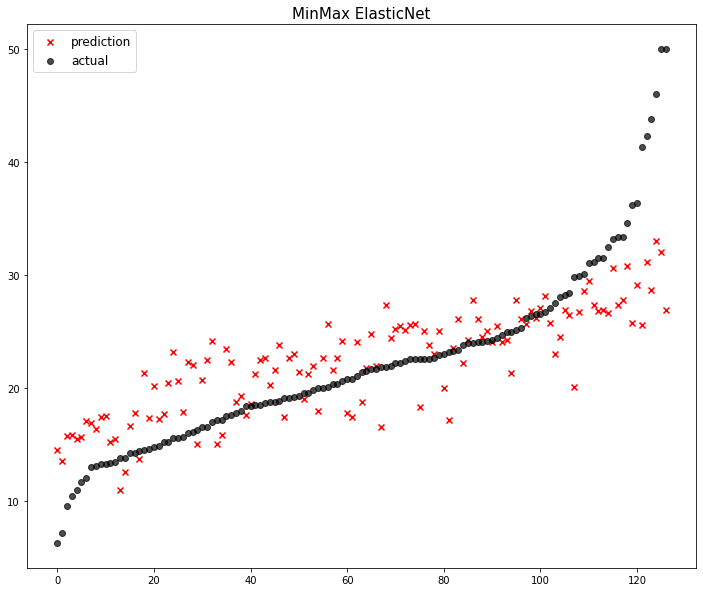

,model,error
0,Lasso(alpha=100),48.725206
1,Lasso(alpha=10),27.146245
2,MinMax ElasticNet,26.572806
3,Lasso(alpha=1),19.882302
4,Ridge(alpha=100),18.018382
5,Lasso(alpha=0.1),17.083615
6,Ridge(alpha=10),17.068408
7,ElasticNet(l1_ratio=0.2),16.914638
8,ElasticNet(l1_ratio=0.5),16.822431
9,Ridge(alpha=1),16.652412


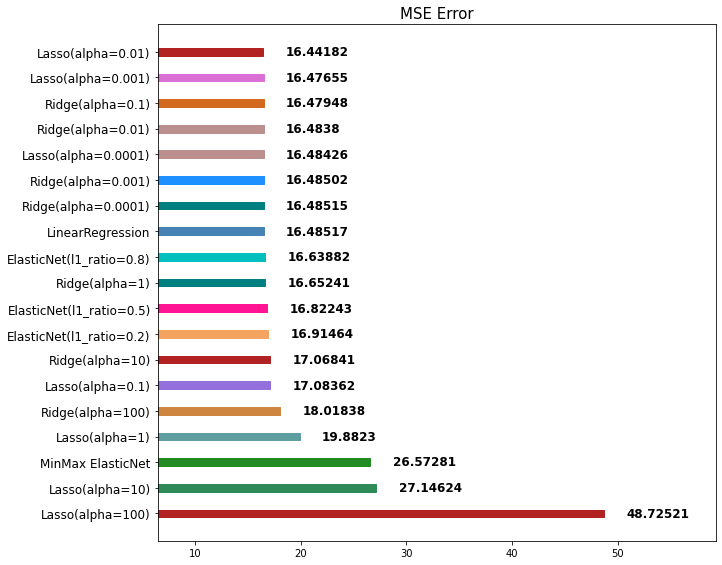

In [71]:
utils.plot_error('MinMax ElasticNet', y_test, pipeline_pred)

- `StandardScaler`를 적용
- ElasticNet, `alpha=0.1`, `l1_ratio=0.2` 적용

In [72]:
# 코드를 입력해 주세요
pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [73]:
# 코드를 입력해 주세요
pipeline.fit(x_train, y_train)
pipeline_pred = pipeline.predict(x_test)

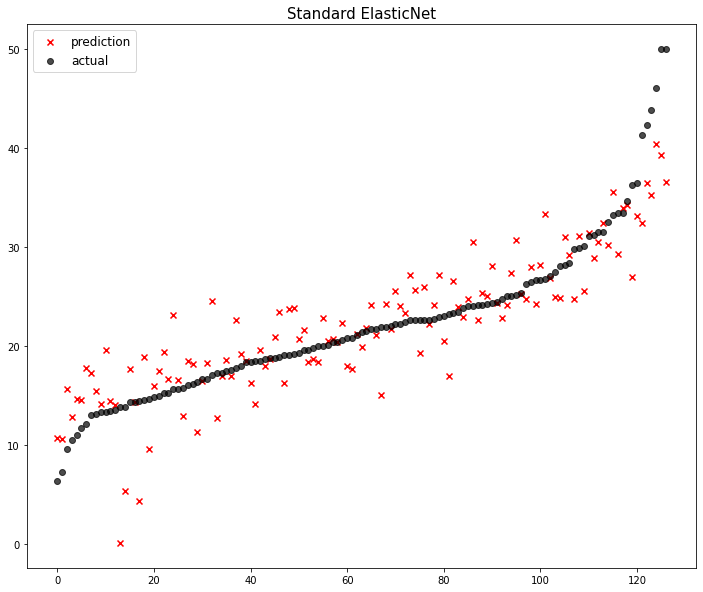

,model,error
0,Lasso(alpha=100),48.725206
1,Lasso(alpha=10),27.146245
2,MinMax ElasticNet,26.572806
3,Lasso(alpha=1),19.882302
4,Ridge(alpha=100),18.018382
5,Lasso(alpha=0.1),17.083615
6,Ridge(alpha=10),17.068408
7,ElasticNet(l1_ratio=0.2),16.914638
8,ElasticNet(l1_ratio=0.5),16.822431
9,Ridge(alpha=1),16.652412


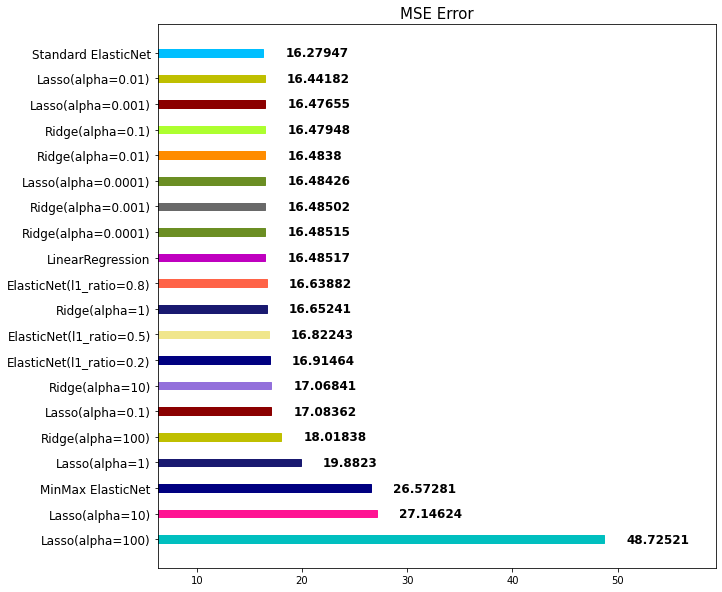

In [74]:
utils.plot_error('Standard ElasticNet', y_test, pipeline_pred)

### Polynomial Features

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

**주의**
- `degree`를 올리면, 기하급수적으로 많은 feature 들이 생겨나며, 학습 데이터에 지나치게 과대적합 될 수 있습니다.

**주요 hyperparameter**

- `degree`: 차수
- `include_bias`: 1로 채운 컬럼 추가 여부

[Polynomial Features 도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
x = np.arange(5).reshape(-1, 1)
x

array([[0],
       [1],
       [2],
       [3],
       [4]])

`degree=2`, `include_bias=False` 인 경우

In [77]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
x_poly

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.]])

`degree=2`, `include_bias=True` 인 경우

In [78]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_poly = poly.fit_transform(x)
x_poly

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

`degree=3`, `include_bias=True` 인 경우

In [79]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_poly = poly.fit_transform(x)
x_poly

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

보스톤 집 값 데이터의 features에 `PolynomialFeatures`를 적용합니다.

In [80]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [81]:
poly_features = poly.fit_transform(x_train)[0]

In [82]:
poly_features

array([     3.321,      0.   ,     19.58 ,      1.   ,      0.871,
            5.403,    100.   ,      1.322,      5.   ,    403.   ,
           14.7  ,    396.9  ,     26.82 ,     11.029,      0.   ,
           65.026,      3.321,      2.893,     17.944,    332.105,
            4.389,     16.605,   1338.383,     48.819,   1318.125,
           89.071,      0.   ,      0.   ,      0.   ,      0.   ,
            0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
            0.   ,      0.   ,      0.   ,    383.376,     19.58 ,
           17.054,    105.791,   1958.   ,     25.877,     97.9  ,
         7890.74 ,    287.826,   7771.302,    525.136,      1.   ,
            0.871,      5.403,    100.   ,      1.322,      5.   ,
          403.   ,     14.7  ,    396.9  ,     26.82 ,      0.759,
            4.706,     87.1  ,      1.151,      4.355,    351.013,
           12.804,    345.7  ,     23.36 ,     29.192,    540.3  ,
            7.141,     27.015,   2177.409,     79.424,   2144.

In [83]:
x_train_poly = poly.fit_transform(x_train)
x_train_poly[0]

array([     3.321,      0.   ,     19.58 ,      1.   ,      0.871,
            5.403,    100.   ,      1.322,      5.   ,    403.   ,
           14.7  ,    396.9  ,     26.82 ,     11.029,      0.   ,
           65.026,      3.321,      2.893,     17.944,    332.105,
            4.389,     16.605,   1338.383,     48.819,   1318.125,
           89.071,      0.   ,      0.   ,      0.   ,      0.   ,
            0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
            0.   ,      0.   ,      0.   ,    383.376,     19.58 ,
           17.054,    105.791,   1958.   ,     25.877,     97.9  ,
         7890.74 ,    287.826,   7771.302,    525.136,      1.   ,
            0.871,      5.403,    100.   ,      1.322,      5.   ,
          403.   ,     14.7  ,    396.9  ,     26.82 ,      0.759,
            4.706,     87.1  ,      1.151,      4.355,    351.013,
           12.804,    345.7  ,     23.36 ,     29.192,    540.3  ,
            7.141,     27.015,   2177.409,     79.424,   2144.

In [84]:
pd.DataFrame(x_train_poly, columns=poly.get_feature_names()).head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x9^2,x9 x10,x9 x11,x9 x12,x10^2,x10 x11,x10 x12,x11^2,x11 x12,x12^2
0,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,...,162409.0,5924.1,159950.70,10808.46,216.09,5834.430,394.254,157529.6100,10644.8580,719.3124
1,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,...,96721.0,4727.2,122073.72,6359.95,231.04,5966.304,310.840,154071.9504,8027.0340,418.2025
2,8.64476,0.0,18.10,0.0,0.693,6.193,92.6,1.7912,24.0,666.0,...,443556.0,13453.2,264335.40,10103.22,408.04,8017.380,306.434,157529.6100,6020.9730,230.1289
3,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,...,162409.0,5924.1,157012.83,773.76,216.09,5727.267,28.224,151795.9521,748.0512,3.6864
4,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,...,443556.0,13453.2,235124.64,9750.24,408.04,7131.408,295.728,124637.2416,5168.5056,214.3296


`PolynomialFeature`도 파이프라인(pipeline)을 활용하여 전처리 해준다면, 손쉽게 구현 및 적용이 가능합니다.

- `PolynomialFeatures: degree=2, include_bias=False` 지정
- `ElasticNet: alpha=0.1, l1_ratio=0.2` 지정

In [85]:
poly_pipeline = make_pipeline(
    # 코드를 입력해 주세요
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [86]:
# 코드를 입력해 주세요
poly_pipeline.fit(x_train, y_train)
poly_pred = poly_pipeline.predict(x_test)

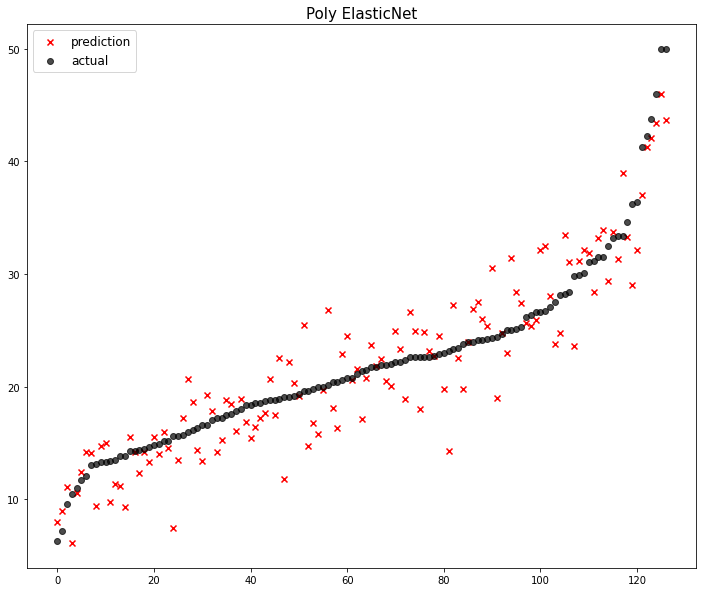

,model,error
0,Lasso(alpha=100),48.725206
1,Lasso(alpha=10),27.146245
2,MinMax ElasticNet,26.572806
3,Lasso(alpha=1),19.882302
4,Ridge(alpha=100),18.018382
5,Lasso(alpha=0.1),17.083615
6,Ridge(alpha=10),17.068408
7,ElasticNet(l1_ratio=0.2),16.914638
8,ElasticNet(l1_ratio=0.5),16.822431
9,Ridge(alpha=1),16.652412


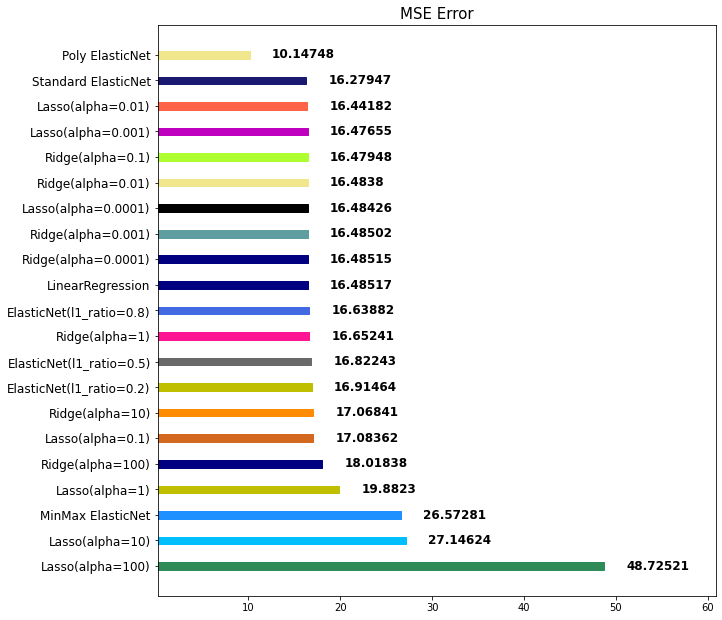

In [87]:
utils.plot_error('Poly ElasticNet', y_test, poly_pred)